In [4]:
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque    
%matplotlib inline
from IPython.display import HTML

## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi$, investigate the motion of the particles from $t = 0$ to $t = 10$

/var/folders/dk/ftlmn22x52vgs9jfjn4msp6r0000gn/T/ipykernel_39203/2753758218.py:38: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ai = np.array([np.sum(aj(ms[j], rs[i], rs[j], i == j) for i in range(N)) for j in range(N)])


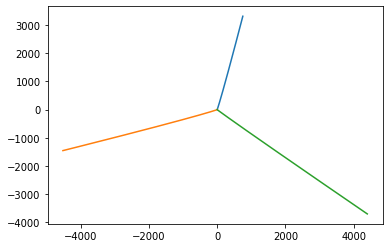

In [5]:
G = 4*np.pi
t = np.linspace(0,10,1000)
m_1 = 3
m_2 = 4
m_3 = 5

x_1 = 1
y_1 = 3

x_2 = -2
y_2 = -1

x_3 = 1
y_3 = -1

r_1 = [x_1, y_1]
r_2 = [x_2, y_2]
r_3 = [x_3, y_3]

ms = [m_1, m_2, m_3]
rs = np.array([r_1, r_2, r_3]).flatten()

N = len(ms)

def aj(mj, ri, rj, is_same):
    if is_same:
        return np.zeros(2)
    r_norm = norm(ri-rj,3)
    total = mj*(ri-rj)/r_norm
    return - G * total


def rhs(ys, t):
    rs_len = len(ys)//2
    rs = ys[:rs_len]
    vi = ys[rs_len:]
    rs = np.array([[rs[i], rs[i+1]] for i in range(0,len(rs),2)])
    ai = np.array([np.sum(aj(ms[j], rs[i], rs[j], i == j) for i in range(N)) for j in range(N)])
    return np.concatenate((vi.flatten() ,ai.flatten()))
    
ys = np.concatenate((rs, np.zeros_like(rs)))
sol = odeint(rhs, ys, t)
for i in range(N):
    plt.plot(sol[:,2 * i], sol[:,2 * i+1])
plt.show()

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 2$, $l_2 = 1$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

In [8]:
theta_1_0 =1.5
d_theta_1_0 = 0
theta_2_0 = 3.0
d_theta_2_0 = 0

y0 = [theta_1_0, d_theta_1_0, theta_2_0, d_theta_2_0]

l_1 = 2
l_2 = 1
m_1 = 2
m_2 = 1
g = 9.8
    
l = l_1 + l_2

def rhs(y0, t):
    theta_1_0, d_theta_1_0, theta_2_0, d_theta_2_0 = y0
    
    A = [[(m_1 + m_2) * l_1, m_2 * l_2 * np.cos(theta_1_0 - theta_2_0)],
         [m_2 * l_1 * np.cos(theta_1_0 - theta_2_0), m_2 * l_2]]
    
    b = [-m_2 * l_2 * d_theta_2_0 ** 2 * np.sin(theta_1_0 - theta_2_0) - (m_1 + m_2) * g * np.sin(theta_1_0),
         m_2 * l_1 * d_theta_1_0 ** 2 * np.sin(theta_1_0 - theta_2_0) - m_2 * g * np.sin(theta_2_0)]
    dd_theta_1_0, dd_theta_2_0 = np.linalg.solve(A, b)
    return d_theta_1_0, dd_theta_1_0, d_theta_2_0, dd_theta_2_0

dt = 0.02
t_stop = 100
history_len = 500
t = np.arange(0, t_stop, dt)
y = odeint(rhs, y0, t)

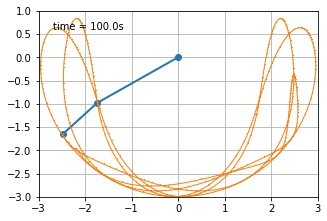

In [9]:
x1 = l_1*sin(y[:, 0])
y1 = -l_1*cos(y[:, 0])

x2 = l_2*sin(y[:, 2]) + x1
y2 = -l_2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-l, l), ylim=(-l, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], ',-', lw=1)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
HTML(ani.to_html5_video())